In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [152]:
#Kütüphane oluşturma

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

In [154]:
## Veri seti yükleme

In [155]:
df = pd.read_csv('/kaggle/input/student-performance/StudentsPerformance.csv')

In [156]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [157]:
# Veri setinde eksik veri var mı diye bakılması

In [158]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [159]:
# Eksik verileri olan satırları çıkarma

In [160]:
df_cleaned = df.dropna()

In [161]:
# Veri tiplerine bakma

In [162]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [163]:
# Aykırı değerleri belirlemek için istatistikler

In [164]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [165]:
# Her bir sütunun benzersiz değerlerine bakma

In [166]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

In [167]:
#Process of Data Visualization 

In [168]:
# Cinsiyete göre matematik başarısını görselleştirme

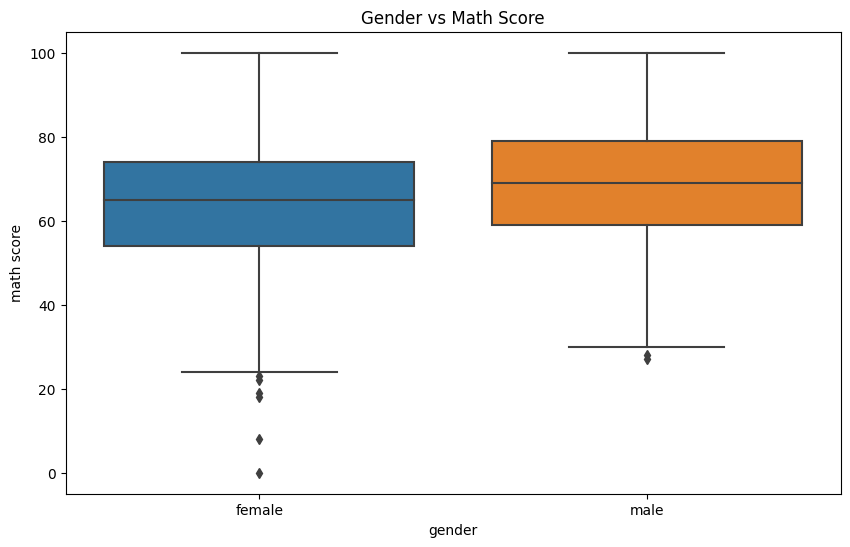

In [169]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Gender vs Math Score')
plt.show()

In [170]:
# Ebeveyn eğitim seviyesine göre okuma başarısını görselleştirme

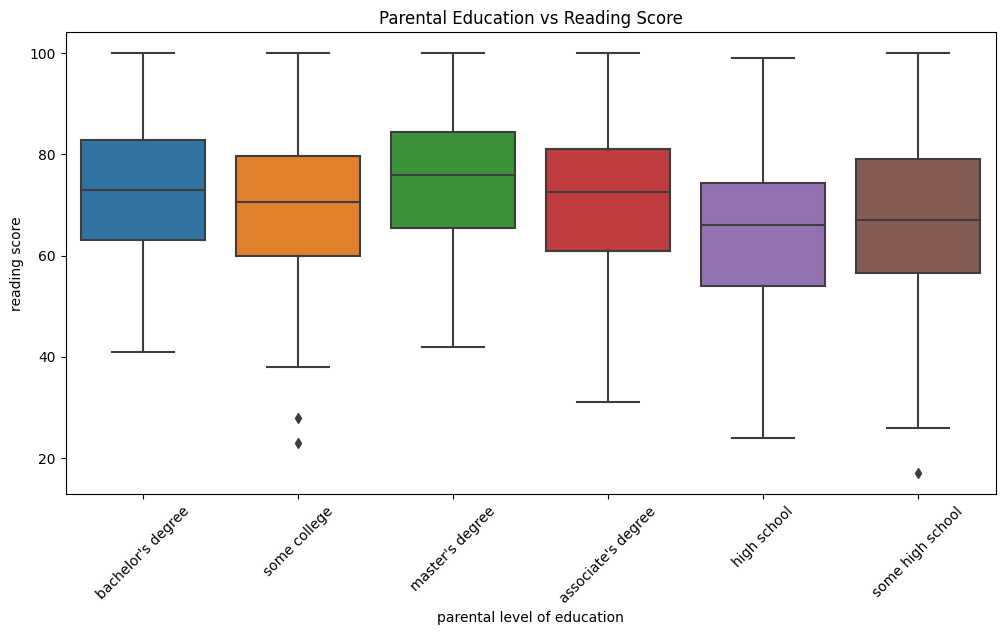

In [171]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Parental Education vs Reading Score')
plt.xticks(rotation=45)
plt.show()

In [172]:
# Korelasyon matrisi

In [180]:
print(df.dtypes)

gender                           object
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course          object
math score                        int64
reading score                     int64
writing score                     int64
total score                       int64
score level                    category
dtype: object


In [181]:
numeric_df = df.select_dtypes(include=[np.number])

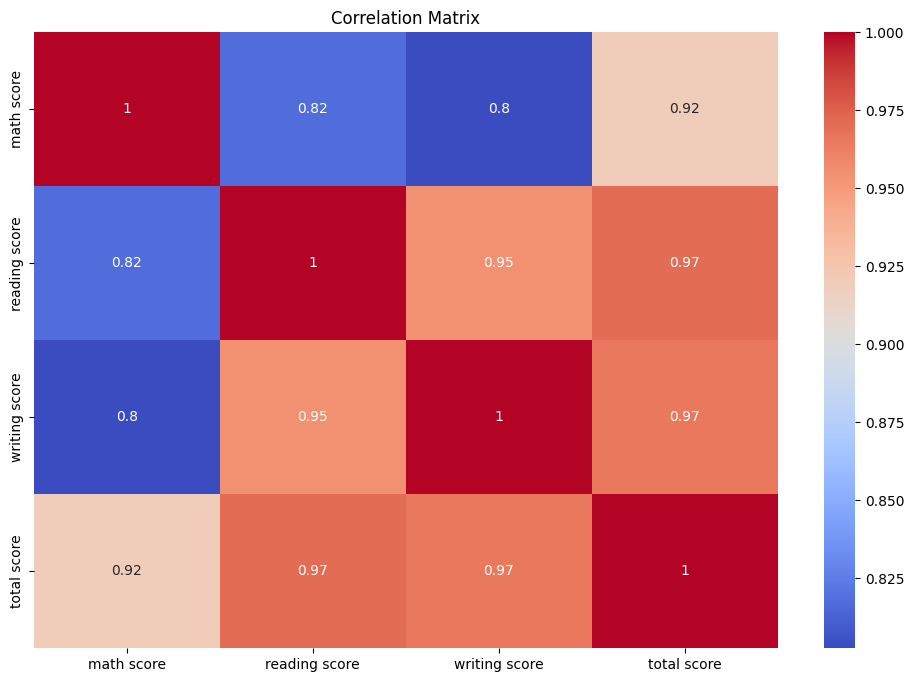

In [182]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [176]:
# Scatter plot

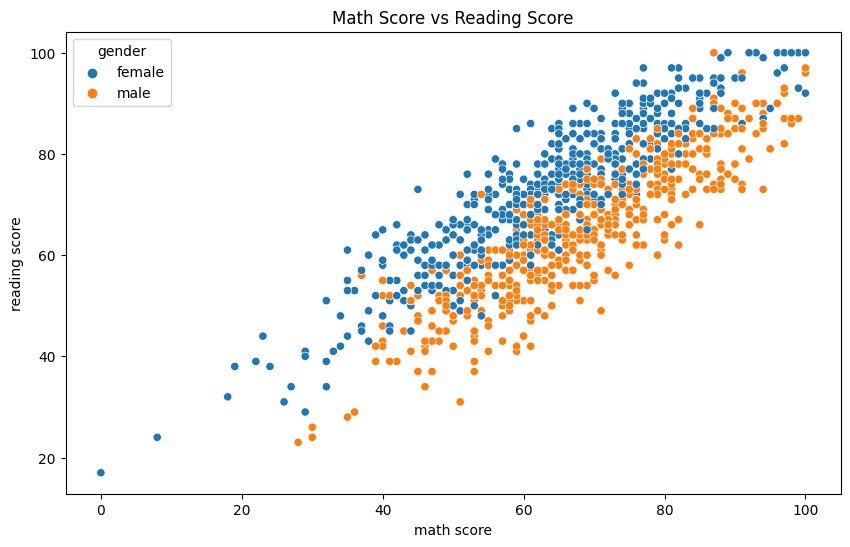

In [177]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='math score', y='reading score', hue='gender', data=df)
plt.title('Math Score vs Reading Score')
plt.show()


In [178]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

In [179]:

bins = [0, 210, 240, 270, 300]
labels = ['Low', 'Medium', 'High', 'Very High']
df['score level'] = pd.cut(df['total score'], bins=bins, labels=labels)
print(df['score level'].value_counts())

score level
Low          553
Medium       253
High         144
Very High     50
Name: count, dtype: int64
